# Телеком — Поиск клиента с неоптимальными тарифами

**Описание проекта**

Наши клиенты − колл-центры, нам необходимо провести анализ предоставленных данных и определить тех, клиентов, что переплачивают на текущих тарифах, а также тех, кто сможет сэкономить, если перейдет на другой тариф.  
  
По заданию, нам надо проанализировать активных клиентов. И провести анализ выручки нашего заказчика после оптимизации затрат клиентов и в случае снижения - оговорить предложения по ее оптимизации.    
  
  <font color='light blue'></font>
<font color='light blue'>Информация по тарифам:</font>  
  
Ежемесячная плата за тариф:  
  
Тариф А — 5000 ₽,  
Тариф B — 2000 ₽,  
Тариф С — 1000 ₽.  
  
Входящие звонки — бесплатны на всех тарифах, Исходящие звонки внутри сети — бесплатны до 2000 минут в месяц на всех тарифах.  
Цена сверх лимита:  
  
Тариф A — 0.1 ₽/мин.,  
Тариф B — 0.15 ₽/мин.,  
Тариф C — 0.3 ₽/мин.  
  
Исходящие звонки, кроме внутренних:  
  
Тариф A — 0.4 ₽/мин.,  
Тариф B — 0.5 ₽/мин.,  
Тариф C — 0.7₽/мин.  
  
За каждого оператора клиент платит 100 ₽ в месяц на любом тарифе — дополнительно к стоимости тарифа и цене звонков. 
Тарификация происходит на основе кумулятивных показателей за период расчета (календарный месяц). Продолжительность звонков за месяц округляется в большую сторону.

## Шаг 1. Загрузка данных и подготовка к анализу

### Импорт библиотек, датасетов и создание функций

In [1]:
# Импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib import rcParams
from scipy import stats as st
from scipy.stats import levene


sns.set(rc={'figure.figsize':(15, 6)}, font_scale=1.2, palette='tab20')
warnings.simplefilter('ignore')
rcParams['figure.figsize'] = 15, 6



In [2]:
# импорт датасетов
data = pd.read_csv('telecom_dataset.csv')
tariff_plan = pd.read_csv('telecom_clients.csv')

In [3]:
def my_analysis(data):
    '''Функция для анализа датафрейма.'''

    # Общая информация.
    print('\033[1m Общая информация \n \033[0m')
    data.info()
    print(30 * '= ')

    # Вывод первых 5 строк датафрейма.
    print('\033[1m Первые 5 строк датафрейма \033[0m')
    display(data.head())
    print(30 * '= ')

    # Названия столбцов.
    print(f'\033[1m Названия столбцов: \033[0m {list(data.columns)}')
    print(30 * '= ')

    # Пропуски.
    print('\033[1m Инофрмация о пропусках \033[0m')
    display(data.isna().sum())
    print(30 * '= ')

    # Полные дубликаты.
    print(f'\033[1m Полных дубликатов: \033[0m {data.duplicated().sum()}')
    print(60*'=')
    #return

def unique(data):
    '''Функция для анализа уникальных значений в столбцах.'''
    
    for gg in data:
        print(f'\033[1m Столбец {data[gg].name} \033[0m')
        print(data[gg].unique())


### Первичный анализ и предобработка данных

In [4]:
my_analysis(data)

 Общая информация 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Первые 5 строк датафрейма 


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Названия столбцов:  ['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Инофрмация о пропусках 


user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Полных дубликатов:  4900


In [5]:
print('\033[1m\nПроцент строк с пропущенными значениями в столбце internal\033[0m',
round(data.internal.isna().sum()/data.user_id.count() * 100, 2))



Процент строк с пропущенными значениями в столбце internal 0.22


In [6]:
my_analysis(tariff_plan)

 Общая информация 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Первые 5 строк датафрейма 


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Названия столбцов:  ['user_id', 'tariff_plan', 'date_start']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Инофрмация о пропусках 


user_id        0
tariff_plan    0
date_start     0
dtype: int64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
 Полных дубликатов:  0


<font color='light blue'> **Просмотр полных дубликатов** </font>

In [7]:
data.loc[data.duplicated()].head(1)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50


In [8]:
data.query('user_id == 166377 and date < "2019-08-06" and operator_id == 880020.0')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50


Непохоже на ошибку которую необходимо исправить. Видимо это ошибка при сборе данных, и дубликаты необходимо удалить

<font color='light blue'> **Преобразуем данные** </font>

In [9]:
data['date'] = pd.to_datetime(data.date, format='%Y-%m-%d %H:%M:%S')  # перевод формата в datetime
data['date'] = pd.to_datetime(data['date'].dt.date)  # отсек время

tariff_plan['date_start'] = pd.to_datetime(
    tariff_plan.date_start, format='%Y-%m-%d %H:%M:%S')  # перевод формата в datetime
tariff_plan['date_start'] = pd.to_datetime(tariff_plan['date_start'].dt.date)  # отсек время

data.dropna(subset=['internal'], inplace=True)  # удаление строк с пропусками в столбце internal
data = data.drop_duplicates()  # удаление полных дубликатов

# перевод в булевы значения
data.internal = data.internal.astype(bool)
data.is_missed_call = data.is_missed_call.astype(bool)

data.user_id = data.user_id.astype(object)  # перевод в формат object
data.operator_id = data.operator_id.astype(object)  # перевод в формат object
tariff_plan.user_id = tariff_plan.user_id.astype(object)  # перевод в формат object

<font color='light blue'> **Проверка преобразований** </font>

In [10]:
data.info() # формат даты, и количество после удаления строк

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              48892 non-null  object        
 1   date                 48892 non-null  datetime64[ns]
 2   direction            48892 non-null  object        
 3   internal             48892 non-null  bool          
 4   operator_id          41491 non-null  object        
 5   is_missed_call       48892 non-null  bool          
 6   calls_count          48892 non-null  int64         
 7   call_duration        48892 non-null  int64         
 8   total_call_duration  48892 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(3), object(3)
memory usage: 3.1+ MB


In [11]:
tariff_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    object        
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 17.3+ KB


In [12]:
data.duplicated().sum() # дубликаты

0

In [13]:
# уникальные значения в столбцах
unique(data)

 Столбец user_id 
[166377 166391 166392 166399 166405 166406 166407 166428 166481 166482
 166485 166487 166495 166503 166507 166511 166520 166533 166536 166541
 166548 166554 166582 166584 166585 166604 166609 166619 166636 166649
 166658 166660 166666 166669 166671 166677 166678 166680 166688 166691
 166692 166697 166708 166711 166713 166717 166725 166726 166727 166732
 166774 166782 166800 166803 166812 166813 166833 166836 166837 166839
 166843 166874 166879 166884 166896 166899 166901 166908 166916 166936
 166939 166940 166941 166946 166955 166958 166971 166973 166974 166975
 166983 166985 166993 166997 167002 167003 167004 167009 167011 167012
 167016 167031 167035 167052 167053 167059 167060 167061 167071 167077
 167078 167079 167082 167102 167109 167110 167112 167113 167114 167122
 167124 167125 167130 167139 167141 167144 167150 167158 167162 167172
 167175 167176 167180 167183 167185 167188 167189 167199 167200 167235
 167238 167242 167244 167246 167250 167263 167264 167265 16

<font color='light blue'> **Проверка звонков с нулевой продолжительностью и с атрибутом "пропущенный"** </font>

In [14]:
data.query('total_call_duration==0 and is_missed_call==False')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
9520,166658,2019-11-06,out,True,890410.0,False,1,0,0
23096,167078,2019-10-23,out,True,935348.0,False,1,0,0


<font color='light blue'> **Дополнительная обработка** </font>

In [15]:
# исключение не пропущенных звонков с 0-й продолжительностью
data = data.query('~(total_call_duration==0 and is_missed_call==False)') 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48890 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              48890 non-null  object        
 1   date                 48890 non-null  datetime64[ns]
 2   direction            48890 non-null  object        
 3   internal             48890 non-null  bool          
 4   operator_id          41489 non-null  object        
 5   is_missed_call       48890 non-null  bool          
 6   calls_count          48890 non-null  int64         
 7   call_duration        48890 non-null  int64         
 8   total_call_duration  48890 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(3), object(3)
memory usage: 3.1+ MB


### Вывод  
  
Для анализа предоставлены две базы данных *telecom_dataset* и *telecom_clients*  
  
**telecom_dataset** содержат данные об использовании услуг виртуальной телефонии «Нупозвони»  
Таблица состоит из 9 столбцов и 53902 строк.  
  
Колонки:  
  
- `user_id` — идентификатор клиента;
- `date` — дата статистики;
- `direction` — направление вызовов: `out` — исходящий вызов, `in` — входящий;
- `internal` — маркер внутренних и внешних вызовов;
- `operator_id` — идентификатор оператора;
- `is_missed_call` — маркер пропущенных вызовов;
- `calls_count` — количество звонков;
- `call_duration` — длительность звонка без учёта времени ожидания;
- `total_call_duration` — длительность звонка с учётом времени ожидания.  
  
<font color='light blue'>В столбце `internal` 117 пропусков.</font> Отсутствие данных может повлиять на анализ, возможности восстановить данные нет, количество строк меньше 0.3% - поэтому такие строки были удалены.  
<font color='light blue'>В столбце `operator_id` 8172 пропуска.</font> Проанализируем такие строки и решим что с ними делать в исследовательском анализе данных. Возможно это не ошибка.  
  
<font color='light blue'>Полных дубликатов 4900 строк.</font> Видимо это тех. ошибка. Дубликаты удалил 
  
В таблице есть две строки с нулевой продолжительностью разговора, но при этом звонок не имеет признака "пропущенный".  
Это явно техническая ошибка. Строки удалил для удобства. На анализ они не повлияют.  
  
Столбец `date` переведен в формат *datetime*  
Столбцы `internal` и `is_missed_call` переведены в формат *bool*  
Столбцы `user_id` и `operator_id` переведены в формат *object*  
  
**telecom_clients** содержит данные по клиентам их тарифам и дате регистрации  
  
Колонки:

- `user_id` — идентификатор клиента;
- `tariff_plan` — тарифный план клиента;
- `date_start` — дата регистрации клиента в сервисе.  
  
Столбец `date_start` переведен в формат *datetime*
Столбец `user_id` переведен в формат *object*  


## Шаг 2. Иследовательский анализ данных.

### Определение активных клиентов

In [17]:
print('\033[1mПервый день в датасете:\033[0m', data.date.min())
print('\033[1mПоследний день в датасете:\033[0m', data.date.max())

Первый день в датасете: 2019-08-02 00:00:00
Последний день в датасете: 2019-11-28 00:00:00


In [18]:
print('\033[1mКоличество клиентов во всем датасете:\033[0m', 
      data.user_id.nunique())

Количество клиентов во всем датасете: 307


In [19]:
# таблица с максимальной датой совершения звонков
max_date_by_user = data.groupby('user_id')['date'].max().reset_index()

print('\033[1mКоличество неактивных пользователей в ноябре:\033[0m', 
      max_date_by_user.query('date<="2019-10-31"').user_id.count())

Количество неактивных пользователей в ноябре: 46


In [20]:
print('\033[1mДоля неактивных клиентов:\033[0m',
      max_date_by_user.query('date<="2019-10-31"').user_id.count()/data.user_id.nunique())

Доля неактивных клиентов: 0.1498371335504886


In [21]:
print('\033[1mКоличество пользователей начавшие пользоваться тарифом с 1 числа месяца:\033[0m',
tariff_plan.query('date_start in ["2019-08-01", "2019-09-01", "2019-10-01", "2019-11-01"]')
      .user_id.nunique())

Количество пользователей начавшие пользоваться тарифом с 1 числа месяца: 25


In [22]:
# список клиентов активных в ноябре
active_users_id = max_date_by_user.query('date>"2019-10-31"').user_id.unique()

# срез только активных пользователей
data_active_users = data.query('user_id in @active_users_id')

# объединение таблиц
data_active_users = data_active_users.merge(tariff_plan,
                                            on='user_id',
                                            how='left')

In [23]:
print('\033[1mДоля уменьшения строк:\033[0m', 
      (data.user_id.count()-data_active_users.user_id.count())
       /data.user_id.count())

Доля уменьшения строк: 0.06645530783391286


#### Вывод  
  
Временной интервал в данных с 02.08.2019 - 28-11-2019.  
Несмотря на то что август и ноябрь не полный, исключать их не будем. Т.к. только 25 клиентов подключались с первого дня месяца. После исключения неактивных клиентов, их станет еще меньше.  
  
Количество неактивных клиентов(не пользовались услугами в ноябре) - 46 шт. (15%).  
Доля записей неактивных клиентов - 6,64%.


### Анализ поведения клиентов

Для дальнейшего анализа создадим столбцы с месяцем днем, и временем ожидания. 

In [24]:
# Создание столбцов с дополнительными данными
data_active_users['month'] = data_active_users['date'].dt.month # месяц
data_active_users['weekday'] = data_active_users['date'].dt.weekday # день

# время ожидания
data_active_users['waiting_time'] = (
    data_active_users['total_call_duration'] - data_active_users['call_duration'])

<font color='light blue'> **Пропуски в столбце operator_id** </font>

In [25]:
print('\033[1mЗначения в столбце is_missed_call:\033[0m', 
      data_active_users.query('operator_id.isna()').is_missed_call.unique())

Значения в столбце is_missed_call: [ True False]


В строках с пустым значением operator_id есть и пропущенные и отвеченные звонки. Проверим долю.

In [26]:
#расчет доли пропущенных звонков для строк без операторов
(
    (data_active_users.query('operator_id.isna()')  #срез. строки без операторов
    .groupby('is_missed_call').agg({'user_id': 'count'}) /  #группировка и количество строк
    data_active_users.query('operator_id.isna()')['user_id'].count())  #деление на общее количество строк
 .style.set_caption('Доля пропусков по признаку is_missed_call')
 )  # титул таблицы

,user_id
is_missed_call,
False,0.015857
True,0.984143


Большая часть звонков это пропущенные звонки. Поставим "заглушку", они могут еще пригодится.

In [27]:
# заполнение пропущенных значений "заглушкой"
data_active_users.operator_id = data_active_users.operator_id.fillna('w/n')

<font color='light blue'> **Пропущенные звонки** </font>

In [28]:
print('\033[1mПропущенные звонки\033[0m')
print('\033[1mДлительность звонков > 0:\033[0m \n', data_active_users.query('call_duration > 0')
      .groupby('is_missed_call')['user_id'].count())
print('\033[1mДлительность звонков 0:\033[0m \n', data_active_users.query('call_duration == 0')
      .groupby('is_missed_call')['user_id'].count())

Пропущенные звонки
Длительность звонков > 0: 
 is_missed_call
False    26008
True       285
Name: user_id, dtype: int64
Длительность звонков 0: 
 is_missed_call
False       13
True     19335
Name: user_id, dtype: int64


Тут явная ошибка в данных. Есть пропущенные звонки с продолжительностью разговора больше 0. И наоборот, отвеченные с продолжительностью разговора 0. Исправим данные в столбце is_missed_call, и проверим.

In [29]:
# замена True на False для непропущенных звонков
data_active_users.loc[data_active_users.call_duration > 0, 'is_missed_call']=False

# замена False на True для пропущенных звонков
data_active_users.loc[data_active_users.call_duration == 0, 'is_missed_call']=True

# проверка
print('\033[1mПропущенные звонки\033[0m')
print('\033[1mДлительность звонков > 0:\033[0m \n',
      data_active_users.query('call_duration > 0').groupby('is_missed_call')['user_id'].count())
print('\033[1mДлительность звонков 0:\033[0m \n',
      data_active_users.query('call_duration == 0').groupby('is_missed_call')['user_id'].count())

Пропущенные звонки
Длительность звонков > 0: 
 is_missed_call
False    26293
Name: user_id, dtype: int64
Длительность звонков 0: 
 is_missed_call
True    19348
Name: user_id, dtype: int64


<font color='light blue'> **Распределение по тарифам** </font>

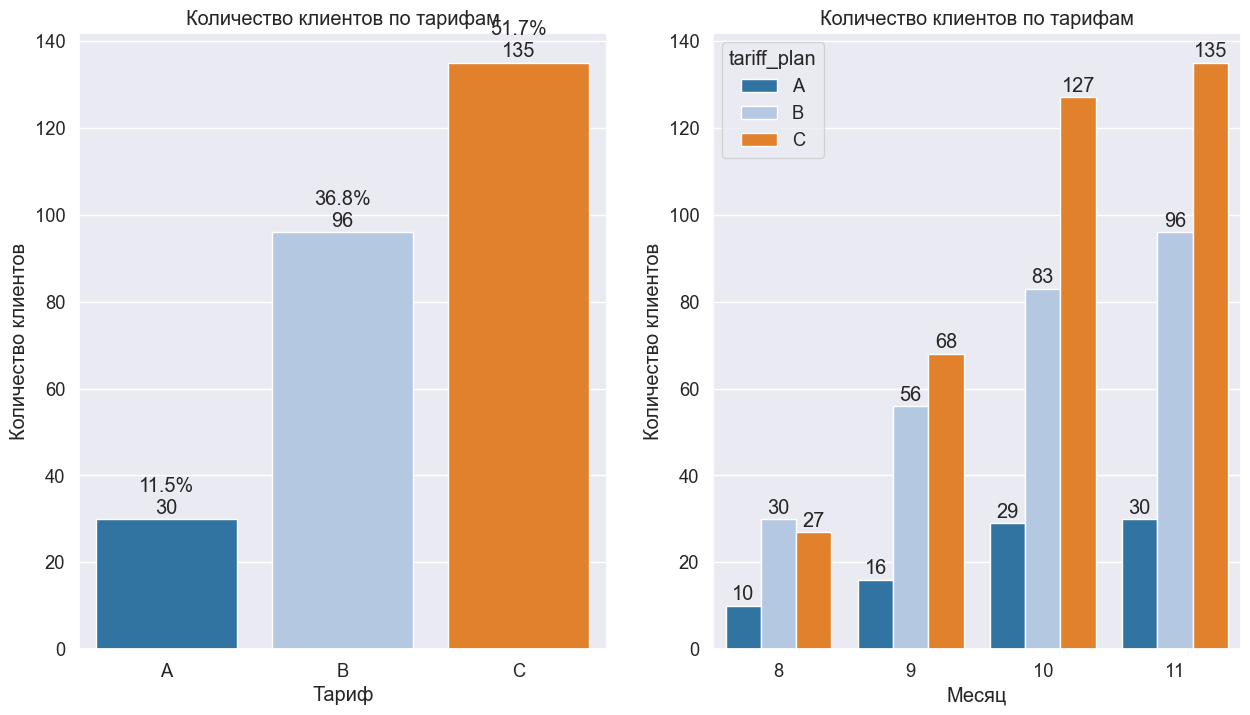

In [30]:
# таблица с количеством по тарифам
users_qnt = data_active_users.groupby(
    'tariff_plan')['user_id'].nunique().reset_index()
# и месяцам
users_qnt_bymonth = data_active_users.groupby(
    ['tariff_plan', 'month'])['user_id'].nunique().reset_index()

# столбчатый график
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# количество клиентов 
axe = sns.barplot(data = users_qnt, x = 'tariff_plan', y='user_id', ax = axes[0])
axes[0].set_title('Количество клиентов по тарифам')
axes[0].set(xlabel='Тариф', ylabel='Количество клиентов')    
for c in axe.containers:
    labels = [f'{v.get_height()/users_qnt.user_id.sum():0.1%}\n{v.get_height():.0f}' for v in c]
    axe.bar_label(c, labels=labels, label_type='edge', padding=1)
    
# количество клиентов по месяцам
axe1 = sns.barplot(data = users_qnt_bymonth, x = 'month', y='user_id', hue='tariff_plan', ax=axes[1])
axes[1].set_title('Количество клиентов по тарифам')
axes[1].set(xlabel='Месяц', ylabel='Количество клиентов')    
for c in axe1.containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    axe1.bar_label(c, labels=labels, label_type='edge', padding=1)
plt.show()


In [31]:
tariff_plan.date_start.min()

Timestamp('2019-08-01 00:00:00')

Самый популярный тариф С.  
Видно, что в августе значительно меньше клиентов чем в ноябре.  
Дата первого подключения клиентов 1 августа. Следовательно, мы можем сделать вывод, что Нупозвони начал свою работу в августе.   Количество клиентов растет ежемесячно по всем тарифам.

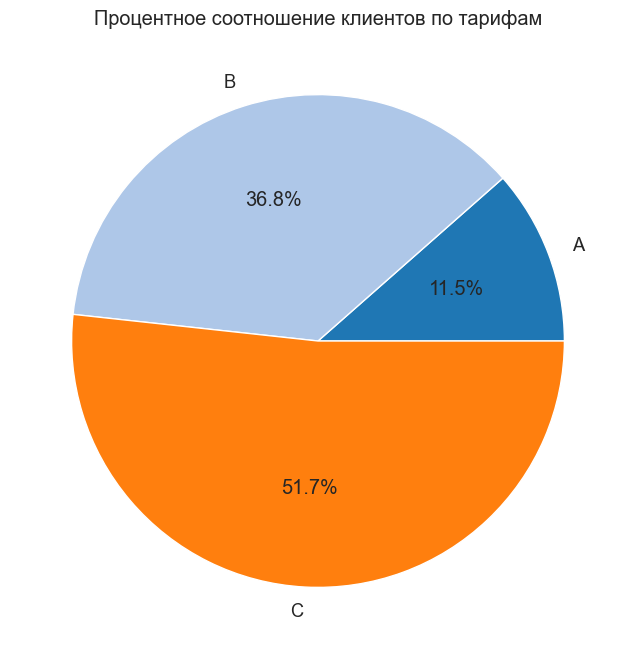

In [32]:
# таблица с количеством клиентов по тарифам
users_qnt_bytar = data_active_users.groupby(
    'tariff_plan')['user_id'].nunique().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(users_qnt_bytar.user_id, labels = users_qnt_bytar.tariff_plan, autopct='%1.1f%%')
plt.title('Процентное соотношение клиентов по тарифам')
plt.show()

Более 50% клиентов у тарифа С

<font color='light blue'> **Распределение по виду звонков** </font>

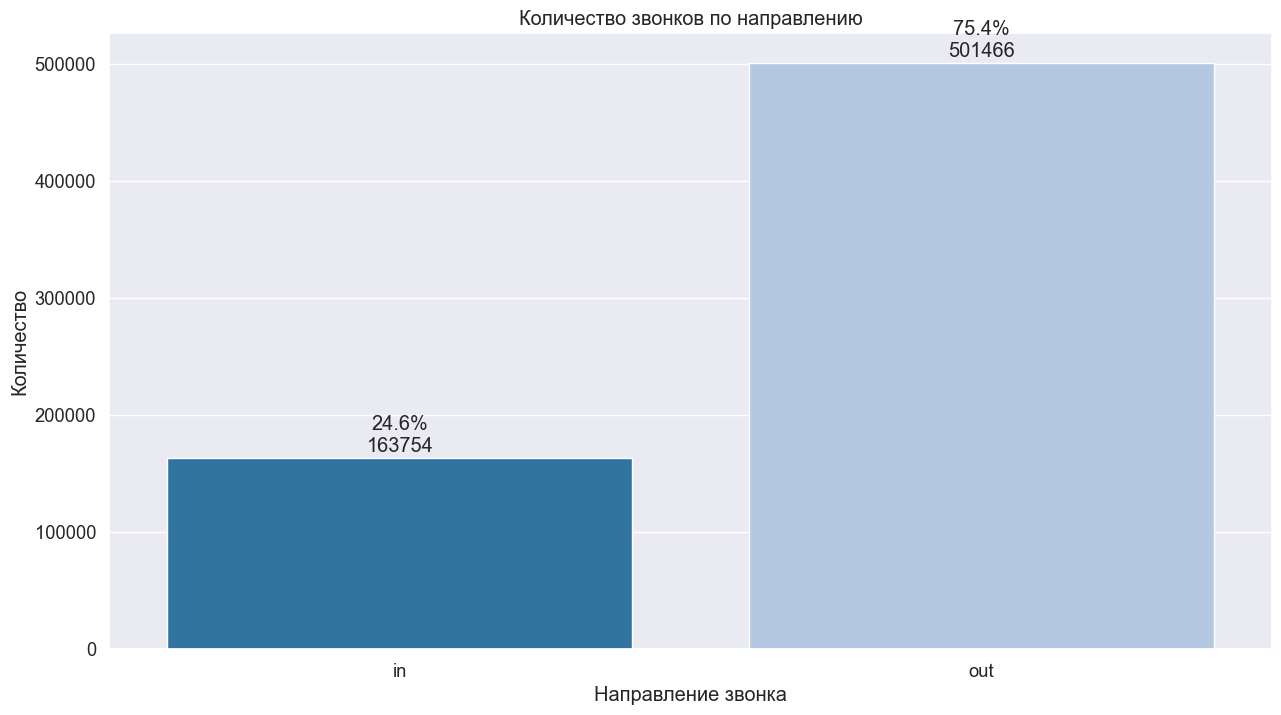

In [33]:
# таблица с количеством по месяцам
int_qnt = data_active_users.groupby('direction')['calls_count'].sum().reset_index()
 
# столбчатый график
plt.figure(figsize=(15, 8))
axe = sns.barplot(data = int_qnt, x = 'direction', y = 'calls_count')
for c in axe.containers:
    labels = [f'{v.get_height()/int_qnt.calls_count.sum():0.1%}\n{v.get_height():.0f}' for v in c]
    axe.bar_label(c, labels=labels, label_type='edge', padding=1)
plt.xlabel('Направление звонка')
plt.ylabel('Количество')
plt.title('Количество звонков по направлению')
plt.show()

Операторы совершили исходящие вызовы в три раза чаще входящих. Видимо наши клиенты это колл-центры предоставляющие услуги обзвона

<font color='light blue'> **Распределение количества звонков и продолжительность звонков в день на одного оператора** </font> 

Создадим таблицу сгруппированную по дате и оператору. Добавим столбцы:  
- минуты - предполагая что в столбце call_duration могут быть секунды продолжительность одного звонка в минутах 
- исходя из предположения что в столбце call_duration могут быть минуты продолжительность одного звонка в минутах 
- исходя из предположения что в столбце call_duration могут быть секунды

In [34]:
calls_duration = (data_active_users.query('operator_id != "w/n"').
                      groupby(['date', 'operator_id'])
                      ['calls_count', 'call_duration'].sum().reset_index())

# минуты предполагая что в столбце call_duration могут быть секунды
calls_duration['duration_min'] = calls_duration['call_duration'] / 60

# продолжительность одного звонка в минутах - исходя из предположения что в столбце call_duration могут быть минуты
calls_duration['one_call_vermin'] = calls_duration.call_duration / calls_duration.calls_count

# продолжительность одного звонка в минутах - исходя из предположения что в столбце call_duration могут быть секунды
calls_duration['one_call_versec'] = calls_duration.duration_min / calls_duration.calls_count

# распределение заисключением дней в которых продолжительность звонка 0 минут
(calls_duration.query('call_duration > 0')
[['calls_count', 'call_duration', 'duration_min', 'one_call_vermin', 'one_call_versec']].describe())

,calls_count,call_duration,duration_min,one_call_vermin,one_call_versec
count,17582.000000,17582.000000,17582.000000,17582.000000,17582.000000
mean,33.449608,2088.520646,34.808677,97.381833,1.623031
std,115.006701,6117.907804,101.965130,129.155716,2.152595
min,1.000000,1.000000,0.016667,0.250000,0.004167
25%,3.000000,170.000000,2.833333,34.900000,0.581667
50%,9.000000,706.000000,11.766667,64.895015,1.081584
75%,29.000000,2089.500000,34.825000,110.780258,1.846338
max,5022.000000,145006.000000,2416.766667,2899.000000,48.316667


In [35]:
# 24-х часовой день
print('\033[1m Доля потерь при расчете в минутах:\033[0m',
round(calls_duration.query('call_duration > 1440').operator_id.count()
      / calls_duration.operator_id.count()
      * 100))

 Доля потерь при расчете в минутах: 33


In [36]:
# распределение заисключением дней в которых продолжительность звонка 0 минут
calls_duration.query('call_duration < 1440 and call_duration > 0').one_call_vermin.describe()

count    11583.000000
mean        84.544603
std        104.123417
min          0.250000
25%         27.920998
50%         56.000000
75%        100.784615
max       1435.000000
Name: one_call_vermin, dtype: float64

In [37]:
calls_duration['month'] = calls_duration['date'].dt.month

В сутках 1440 минут.  
*Если в столбце call_duration указаны минуты:*
Средня продолжительность звонков в день 2088 минут и максимальное значение 145006 минут. Это указывает на наличие явных аномалий. Средняя продолжительность одного звонка 97 минуты. Что так же указывает нам на наличие аномалий. 33% данных содержат таких аномальных операторов.  
При исключении строк с продолжительностью разговора более 1440 минут и с 0, Средняя продолжительность одного 84 минуты

*Если в столбце call_duration указаны секунды:*  
Средня продолжительность звонков в день 34,80 минуты(75% дней/операторов не разговаривают более 34.82 мин) и максимальное значение 2416 минут. Тут аномалии в другую сторону. Это странный бизнес у которого сотрудники работают 35 минут в день.
Средняя продолжительность одного разговора 1.62, можно было бы объяснить что у клиентов большая часть операторов это боты. Но тогда навряд ли у клиентов были бы внутренние звонки.  
  
Если мы будем исходить из того что в указаны секунды, то при расчете выручки у нас основная часть будет состоять из абонентской платы, в результате почти все клиенты с тарифами A и B будут в категории "неоптимальные".   
  
Поэтому мы будем делать расчет исходя из того что продолжительность указана в минутах.  
Мы не можем исключить аномальные данные т.к. потеряем 30% данных, что исказит наш анализ. 
Так же возможно аномалии не в столбце с продолжительностью звонков. Возможно ошибки в столбце с номером операторов или даты. Возможно ошибки в столбце с количеством звонков. Востановить корректные данные мы не можем, будем работать с тем что есть.

<font color='light blue'> **Распределение минут и звонков по месяцам/по дням недели** </font>

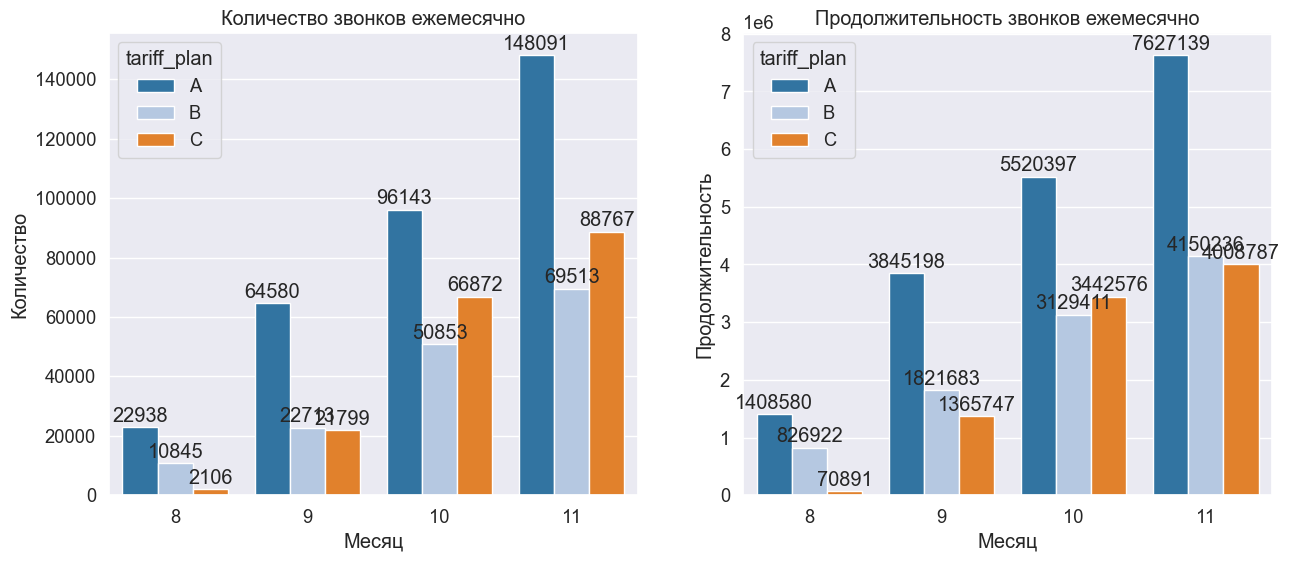

In [38]:
# группировка месяц.тариф - сумма количество звонков и продолжительность
grouped_by_month = (data_active_users.groupby(['month', 'tariff_plan'])
                      ['calls_count', 'call_duration'].sum().reset_index())


# столбчатый график
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# количество звонков ежемесячно
axe1 = sns.barplot(data = grouped_by_month, x = 'month', 
                   y='calls_count', hue='tariff_plan', ax = axes[0])
for c in axe1.containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    axe1.bar_label(c, labels=labels, label_type='edge', padding=1)
axe1.set(xlabel='Месяц', ylabel='Количество')
axe1.set_title('Количество звонков ежемесячно')

# продолжительность звонков ежемесячно
axe2 = sns.barplot(data = grouped_by_month, x = 'month', 
                   y='call_duration', hue='tariff_plan', ax=axes[1])
for c in axe2.containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    axe2.bar_label(c, labels=labels, label_type='edge', padding=1)
axe2.set(xlabel='Месяц', ylabel='Продолжительность')
axe2.set_title('Продолжительность звонков ежемесячно')
plt.show()

Как следствие роста клиентов, растет и количество звонков и минут у всех тарифов.

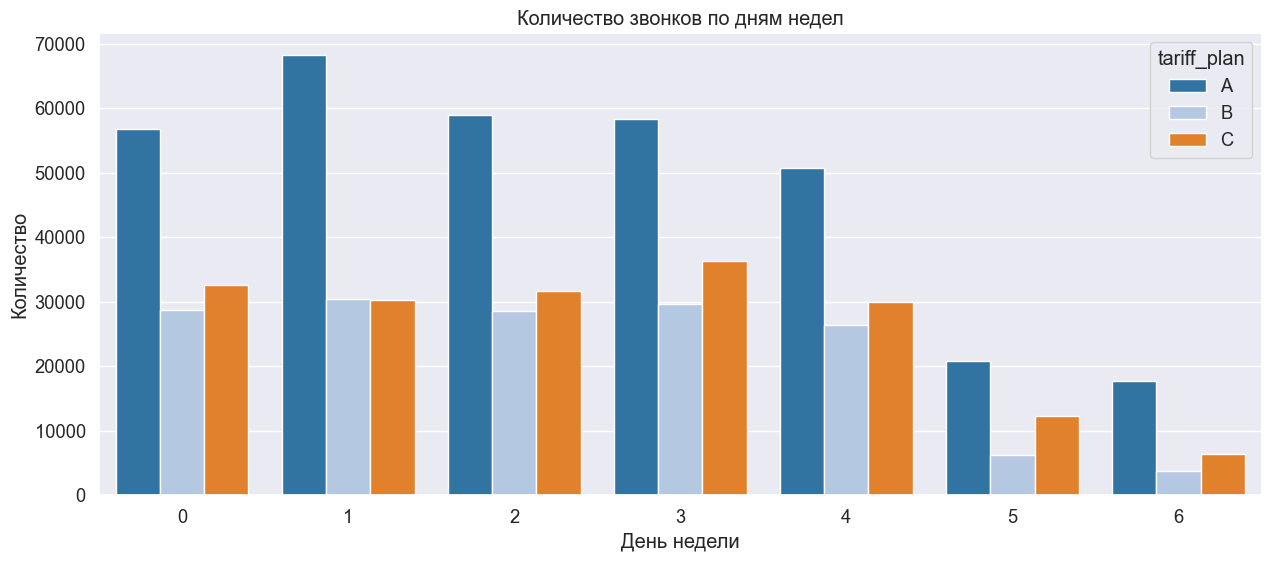

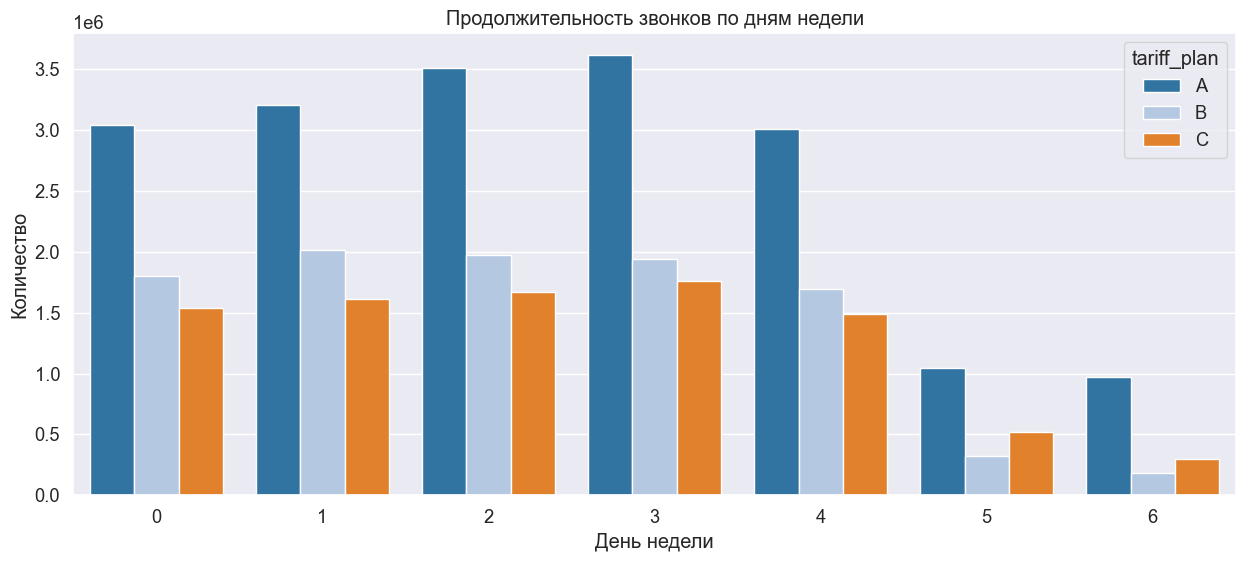

In [39]:
# группировка день недели.тариф - количество звонков и продолжительность
grouped_by_weekday = (data_active_users.groupby(['weekday', 'tariff_plan'])
                    ['calls_count', 'call_duration'].sum().reset_index())

# количество звонков по дням недели
sns.barplot(x='weekday', y='calls_count', data=grouped_by_weekday, hue='tariff_plan')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.title('Количество звонков по дням недел')
plt.show()

# продолжительность звонков по дням недели
sns.barplot(x='weekday', y='call_duration', data=grouped_by_weekday, hue='tariff_plan')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.title('Продолжительность звонков по дням недели')
plt.show()


In [40]:
print('\033[1mКоличество клиентов не работающих в выходные\033[0m', 
      data_active_users.user_id.nunique() - data_active_users.query('weekday >4').user_id.nunique())

Количество клиентов не работающих в выходные 49


В будние дни активность у клиентов больше чем в выходные. 49 клиентов не работают в выходные.

<font color='light blue'> **Анализ операторов** </font> 

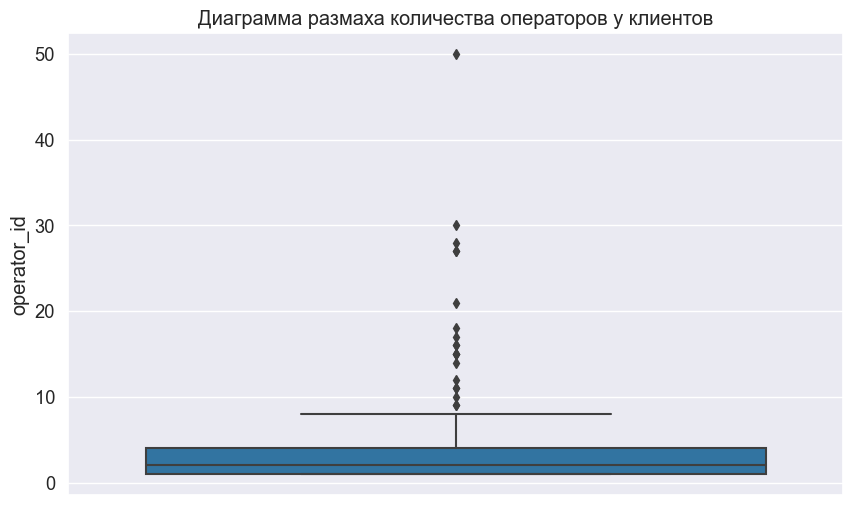


 Количество операторов у клиентов 



count    251.000000
mean       3.832669
std        5.394431
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       50.000000
Name: operator_id, dtype: float64

In [41]:
# группировка user_id-количество операторов
operator_count = (data_active_users.query('operator_id != "w/n"')
                  .groupby('user_id')['operator_id'].nunique())

#Диаграмма размаха
plt.figure(figsize=(10, 6))
sns.boxplot(y=operator_count)
plt.title('Диаграмма размаха количества операторов у клиентов')
plt.show()

print('\n \033[1mКоличество операторов у клиентов\033[0m \n')
operator_count.describe()


В среднем у клиентов 3,83 оператора. более 8 операторов это редкость. Максимум 50 операторов.

<font color='light blue'> **Анализ времени ожидания** </font> 

In [42]:
# таблица сгрупированная тарифный план - сумма времени ожидания в минутах
# фильтр - только исходящие внешние звонки
waiting_time = (data_active_users.query('direction == "out" and internal == False')
 .groupby('tariff_plan')['waiting_time'].sum())

print('\033[1m \n Общее время ожидания в минутах по тарифам: \033[0m')
print(waiting_time)

print('\033[1m \n Общая сумма трат на минуты ожидания: \033[0m',
waiting_time[0] * .4 + waiting_time[1] * .5 + waiting_time[2] * .7)


 
 Общее время ожидания в минутах по тарифам: 
tariff_plan
A    5761097
B    1685883
C    2065192
Name: waiting_time, dtype: int64
 
 Общая сумма трат на минуты ожидания:  4593014.7


#### Вывод   
  
**Пропуски в столбце `is_missed_call`.**  
98,41% строк - это входящие звонки. Можно предположить что это неотвеченные и нераспределенные звонки по операторам.  
1,58 % строк - исходящие звонки. Это явные ошибки, или в сборе данных или технические ошибки. Восстановить данные не  представляется возможным, в целом нет понимания где, ошибка - в направлении звонка или в определении ID оператора.  
  
**Аномалии в столбце пропущенные звонки**  
В процессе исследования были выявлены аномалии в столбце `internal` .  
285 звонков, с продолжительностью разговора более 0 секунд, попали в категорию "Пропущен".  
13 звонков, с продолжительностью разговора 0 секунд, попали в категорию "Отвечен".  
  
**Количество клиентов по тарифам:**  
- A - 30 (11,5%)  
- B - 96 (36,8%)  
- C - 135 (51,7%)  
  
**Типы звонков**  
Количество внешних звонков в три раза больше чем внутренних.(501 466 против 163 754)  
  
**Значения в столбце `call_duration`**  
У нас нет данных в каком виде данные в столбце в минутах или секундах. Проведя анализ для обоих вариантов я пришел к выводу что в обоих случаях данные будут аномальны.  
В секундах: будет слишком много операторов с продолжительностью звонков в день не больше часа.  
В минутах: наоборот 30% операторов разговаривают более 24 часов в сутки. Но для этого варианта можно предположить ошибки в других столбцах. Например, оператор, день. Так же средняя продолжительности одного звонка 84 минуты, это может указывать на ошибки в столбце с количеством звонков.
  
**Количество и продолжительность звонков**   
На графике виден рост и количества звонков и продолжительности по всем тарифам. В течении всего периода самые активные клиенты с тарифом А (в Ноябре 7 627 139 минута против 4 150 236 у тарифа B и 4 008 787 у тарифа С).  
В выходные дни меньше активность у всех клиентов, минимум в 3 раза. 49 клиентов не работает в выходные.  
  
**Продолжительность звонков в день на одного оператора**   
99% операторов тратят на звонки не более 5 часов. Так же есть аномальные операторы которые разговаривают более 8 часов в день. Мы не знаем какой график работы у клиентов, исходить из трудового кодекса и практики большинства компаний в РФ - 8 часов.  
В данных есть 3 клиента и 5 операторов у которых есть аномальные записи. Удалять только ID операторов считаю не целесообразным, т.к. мы не можем быть уверены что данные других операторов, этих клиентов, корректны  
У аномальных клиентов есть дни с продолжительностью разговора не больше часа, значит мы не можем предположить что у этих операторов указаны дынные в миллисекундах.  
  
**Время ожидания**  
На минуты ожидания клиенты потратили 4 593 014.7 руб за 4 месяца   
  
В среднем у клиентов 3,83 оператора, максимум 50.  

### Расчет выручки и определение перспективного тарифа

#### Расчет

<font color='light blue'> **Стоимость минут.** </font> 

In [43]:
active_users = data_active_users

Сгруппируем данные по клиентам, месяцам, направлению и тарифу. И посчитаем продолжительность

In [44]:
# подгатовка файла для расчета выручки
revenue = (active_users.query('direction == "out"') # исключение входящих звонков
 .groupby(['user_id', 'month', 'internal', 'tariff_plan']) # группировка
           ['total_call_duration'] .sum().reset_index()) # сумма
# расчет звонков в пинутах. округление к большему

revenue.head(8)

,user_id,month,internal,tariff_plan,total_call_duration
0,166377,8,False,B,78029
1,166377,8,True,B,96
2,166377,9,False,B,105835
3,166377,9,True,B,9
4,166377,10,False,B,99207
5,166377,10,True,B,5
6,166377,11,False,B,95384
7,166377,11,True,B,127


In [45]:
# создание таблицы с тарифами
df_tariffs = pd.DataFrame(
    {
        'tariff_plan': ['A', 'B', 'C'],
        'price_month': [5000, 2000, 1000],
        'calls_out_internal': [0.1, 0.15, 0.3],
        'calls_out_external': [0.4, 0.5, 0.7]
    }
)

Создадим три столбца для каждого тарифа в который посчитаем стоимость трат на звонки. Для дальнейшего сравнения с текущим тарифом, и выявления оптимального

In [46]:
# расчет расходов на исходящие звонки внутренние и внешние для всех тарифов
for i, tariff in enumerate(df_tariffs['tariff_plan']):
    revenue['part_' + tariff] = revenue.loc[(revenue['internal'] == True) & 
                                (revenue['total_call_duration'] > 2000)]['total_call_duration'] \
                                * df_tariffs['calls_out_internal'][i]
    revenue['part_' + tariff] = revenue.loc[(revenue['internal'] == False)]['total_call_duration'] \
                                * df_tariffs['calls_out_external'][i]
    revenue['part_' + tariff] = revenue['part_' + tariff].fillna(0)

In [47]:
revenue.head(1)

,user_id,month,internal,tariff_plan,total_call_duration,part_A,part_B,part_C
0,166377,8,False,B,78029,31211.6,39014.5,54620.3


<font color='light blue'> **Добавление абонентской платы и расходов на операторов.** </font> 

Сгруппируем, что бы убрать деление на внутренние и внешние. Добавим количество операторов для каждого клиента.

In [48]:
# группировка, убираем деление на внутренние и внешние
revenue = revenue.groupby(['user_id', 'month', 'tariff_plan']) \
          ['part_A', 'part_B', 'part_C'].sum().reset_index()

In [49]:
# подсчет количества операторову каждого клиента
operators = (active_users.query('operator_id != "w/n"')
             .groupby(['user_id', 'month'])['operator_id']
             .nunique().reset_index())

# добавление операторов к таблице с выручкой
revenue = revenue.merge(operators, on = ['user_id', 'month'], how = 'left')

В столбцы с выручкой добавим абонентскую плату и плату за операторов

In [50]:
operator_cost = 100 # стоимость за одного оператора

# Добавление абонентской платы и расходов на операторов
for i, tariff in enumerate(df_tariffs['tariff_plan']):
    revenue['profit_' + tariff] = (
        df_tariffs['price_month'][i] + 
        (revenue['operator_id'] * operator_cost) +
        revenue['part_' + tariff])

Создадим функцию и с помощью нее создадим столбец с выручкой по текущему тарифу

In [51]:
def opt_tariff(row):
    '''Функция для создания столбца с актуальным тарифом'''
    if row['tariff_plan'] == 'A':
        return row['profit_A']
    if row['tariff_plan'] == 'B':
        return row['profit_B']
    if row['tariff_plan'] == 'C':    
        return row['profit_C']
    
revenue['actual_tariff'] = revenue.apply(opt_tariff, axis = 1)

<font color='light blue'> **Оптимальный тариф.** </font> 

Выявим оптимальный тариф и создадим столбец с выручкой по этому тарифу

In [52]:
# создание столбца с оптимальными тарифом
revenue['best_tariff'] = revenue[['profit_A', 'profit_B', 'profit_C']].idxmin(axis=1)

In [53]:
# сокращения названия оптимального тарифа
revenue['best_tariff'] = revenue['best_tariff'].replace('profit_A', 'A')
revenue['best_tariff'] = revenue['best_tariff'].replace('profit_B', 'B')
revenue['best_tariff'] = revenue['best_tariff'].replace('profit_C', 'C')

In [54]:
def opt(row):
    '''Функция для создания столбца с определением оптимальный текущий тариф или нет'''
    if row.tariff_plan == row.best_tariff:
        return True
    else:
        return False
    
revenue['optimal'] = revenue.apply(opt, axis = 1)

In [55]:
# Расчет гипотетических затрат
def rev_hypothetic(row):
    '''Функция для создания столбца с выручкой по оптимальному тарифу'''
    if row['best_tariff'] == 'A':
        return row['profit_A']
    if row['best_tariff'] == 'B':
        return row['profit_B']
    if row['best_tariff'] == 'C':    
        return row['profit_C']
    
revenue['rev_hypothetic'] = revenue.apply(rev_hypothetic, axis = 1)

Создадим столбец с суммой переплаты и с процентом переплаты

In [56]:
# суммы переплаты по неоптимальному тарифу
revenue['over'] = revenue['actual_tariff'] - revenue['rev_hypothetic']

# процент переплаты по неоптимальному тарифу
revenue['over_%'] = revenue['over'] / revenue['actual_tariff'] * 100

In [57]:
revenue.head(5)

,user_id,month,tariff_plan,part_A,part_B,part_C,operator_id,profit_A,profit_B,profit_C,actual_tariff,best_tariff,optimal,rev_hypothetic,over,over_%
0,166377,8,B,31211.6,39014.5,54620.3,5,36711.6,41514.5,56120.3,41514.5,A,False,36711.6,4802.9,11.569211
1,166377,9,B,42334.0,52917.5,74084.5,4,47734.0,55317.5,75484.5,55317.5,A,False,47734.0,7583.5,13.709043
2,166377,10,B,39682.8,49603.5,69444.9,5,45182.8,52103.5,70944.9,52103.5,A,False,45182.8,6920.7,13.282601
3,166377,11,B,38153.6,47692.0,66768.8,4,43553.6,50092.0,68168.8,50092.0,A,False,43553.6,6538.4,13.052783
4,166391,8,C,0.0,0.0,0.0,2,5200.0,2200.0,1200.0,1200.0,C,True,1200.0,0.0,0.000000


Посчитали выручку для каждого клиента по трем тарифам. Выявили оптимальный тариф. Создали столбец с маркером является ли текущий тариф оптимальным или нет. Создали столбец с выручкой для оптимального тарифа. И посчитали переплату и процент переплат.

#### Анализ

<font color='light blue'> **Выручка.** </font> 

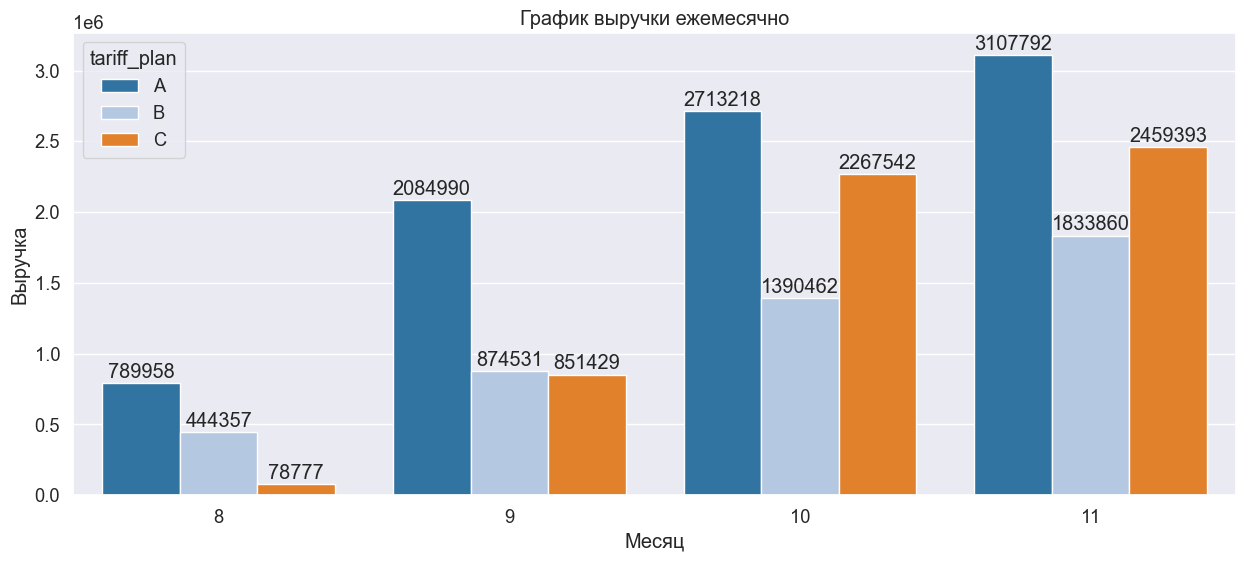

In [58]:
# таблица с выручкой по тарифам и месяцам
rev_t = revenue.groupby(['tariff_plan', 'month'])['actual_tariff'].sum().reset_index()

# столбчатый график
plt.figure(figsize=(15, 6))
ax_ret_v = sns.barplot(data = rev_t, x = 'month', y = 'actual_tariff', hue = 'tariff_plan')
for c in ax_ret_v.containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    ax_ret_v.bar_label(c, labels=labels, label_type='edge', padding=1)
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title('График выручки ежемесячно')
plt.show()

Ранее мы видели рост клиентов, количества звонков и минут. Выручка ожидаемо растет так же по всем тарифам.

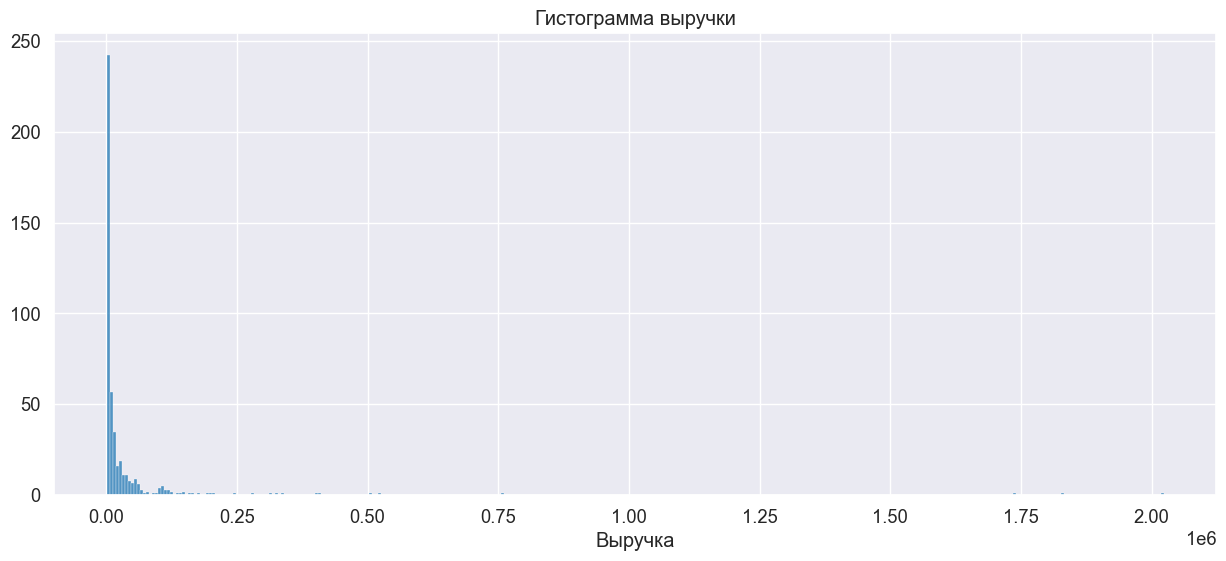

count        469.00000
mean       40290.63646
std       161924.88312
min         1100.00000
25%         2496.40000
50%         6662.80000
75%        24877.30000
max      2022995.60000
Name: actual_tariff, dtype: object

In [59]:
# гистограмма
sns.histplot(revenue.actual_tariff)
plt.xlabel('Выручка')
plt.ylabel('')
plt.title('Гистограмма выручки')
plt.show()

revenue.actual_tariff.describe().apply(lambda x: '%.5f' % x)

In [60]:
print('\033[1m \n Персентил платежей ежемесячно, 95 и 99 % \033[0m', 
      np.percentile(revenue.actual_tariff, [95, 99]))

 
 Персентил платежей ежемесячно, 95 и 99 %  [123367.88 511248.4 ]


Средняя выручка на одного клиента 40290 руб, медиана 6662. Такой разброс объясним ранее выявлеными аномалиями.

<font color='light blue'> **Средний чек.** </font> 

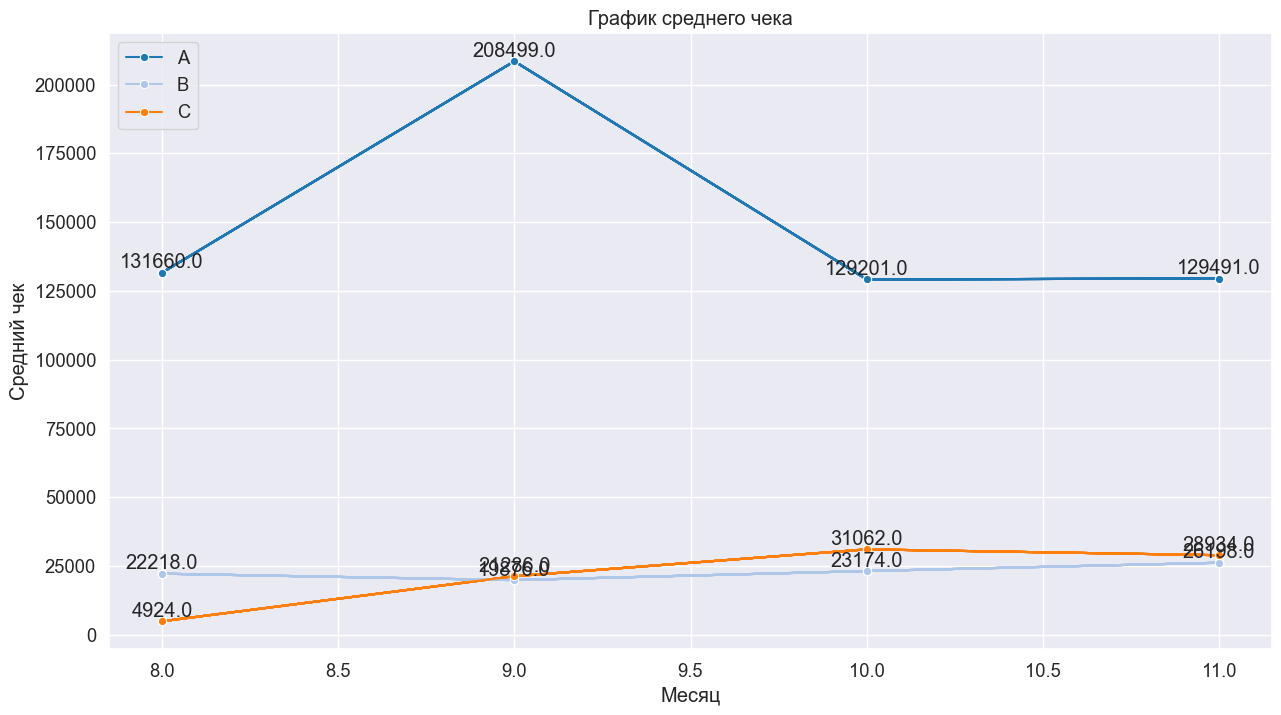

In [61]:
# таблица среднего чека в месяц по тарифу
mean_check = revenue.groupby(['tariff_plan', 'month']).actual_tariff.mean().reset_index()
mean_check = mean_check.rename (columns = {'actual_tariff':'mean'}) # переименование столбца
mean_check['mean'] = round(mean_check['mean']) # округление

# линейный график
plt.figure(figsize=(15, 8))
for i, txt in enumerate(mean_check['mean']):
    (sns.lineplot(data = mean_check, x = 'month', y = 'mean', hue = 'tariff_plan', marker='o')
     .annotate(txt, xy=(mean_check['month'][i], txt+150), ha='center', va='bottom'))
plt.legend(loc='upper left', labels=['A', 'B', 'C'])
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.title('График среднего чека')
plt.show()

Средний чек выше у тарифа A. У тарифов В и С средний чек из месяца в месяц не имеет динамику роста или снижения. У тарифа А резкий скачек в сентябре, но в октябре вернулся в норму.

<font color='light blue'> **Переплата.** </font> 

In [62]:
print('\033[1m \n Общая сумма переплат \033[0m:', revenue.over.sum())

 
 Общая сумма переплат : 2653226.9999999995


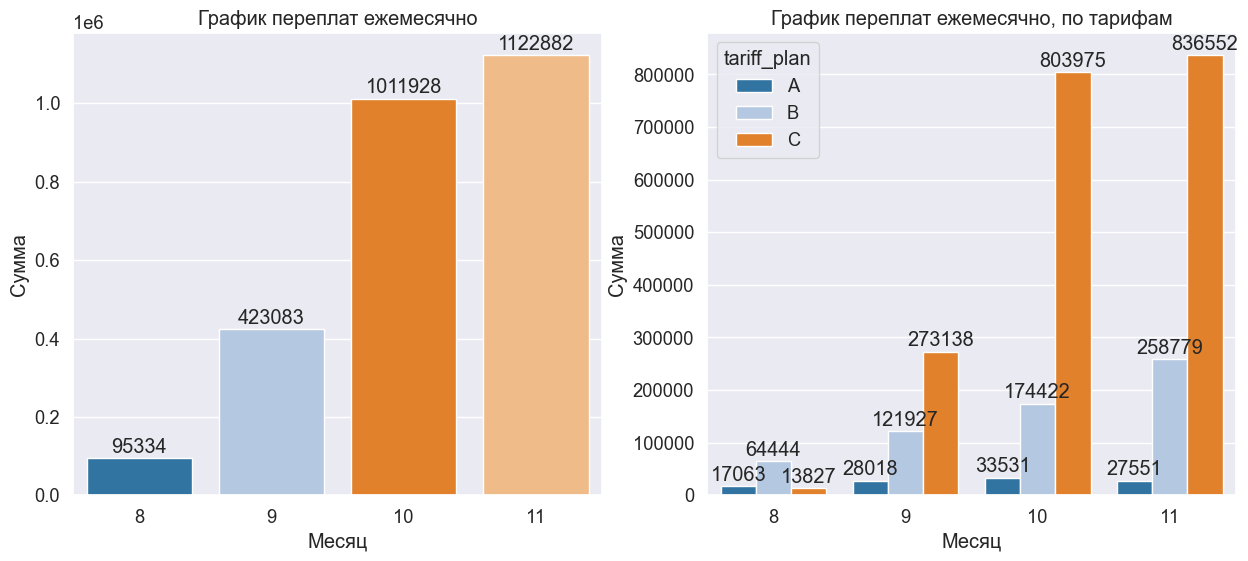

In [63]:
# таблица переплат сгруппированная месяц.тариф - сумма переплаты
over_month_tar = revenue.groupby(['month', 'tariff_plan'])['over'].sum().reset_index()

# столбчатый график
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# общая сумма переплат помесячно
axe1 = sns.barplot(x = revenue.groupby('month')['over'].sum().index, 
            y = revenue.groupby('month')['over'].sum(), ax=axes[0])
for c in axe1.containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    axe1.bar_label(c, labels=labels, label_type='edge', padding=1)
axe1.set(xlabel='Месяц', ylabel='Сумма')
axe1.set_title('График переплат ежемесячно')

# общая сумма переплат помесячно и тарифам
axe2 = sns.barplot(data = over_month_tar, x = 'month', 
            y = 'over', hue = 'tariff_plan', ax=axes[1])
for c in axe2.containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    axe2.bar_label(c, labels=labels, label_type='edge', padding=1)
axe2.set(xlabel='Месяц', ylabel='Сумма')
axe2.set_title('График переплат ежемесячно, по тарифам')
plt.show()

Переплаты растут соотвественно развитию бизнеса. Клиенты тарифа С переплачивают больше в абсолютных величинах, особенно это заментно в октябре-ноябре. 

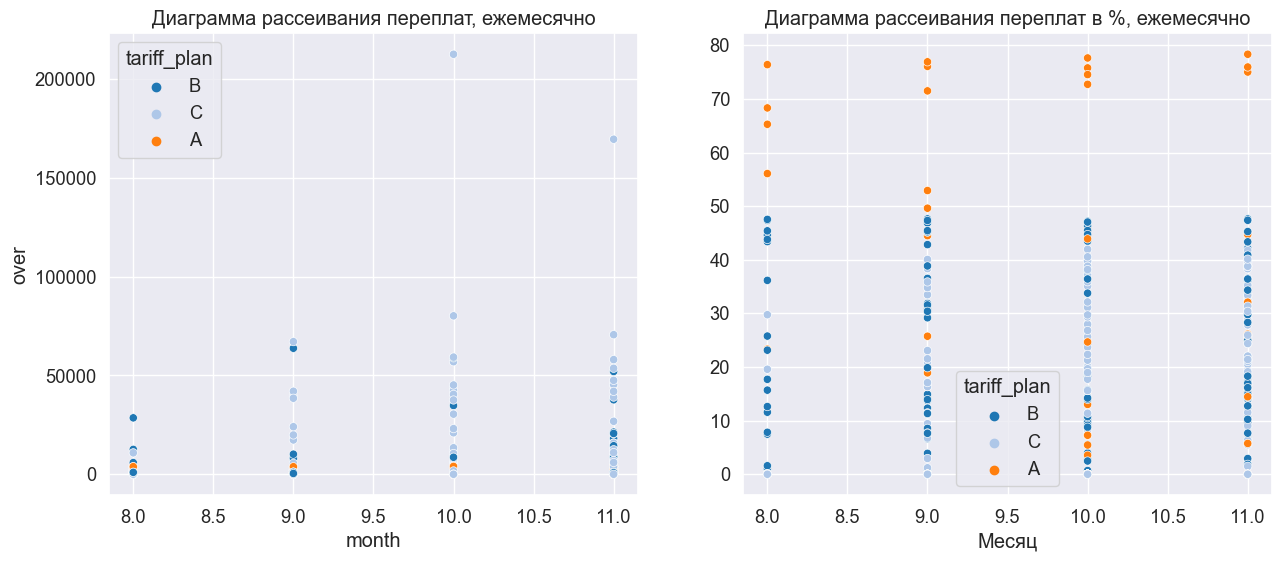

In [64]:
# диаграмма рассеяния
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# сумма переплат помесячно
axe1 = sns.scatterplot(data=revenue, x='month', y='over', hue='tariff_plan', ax=axes[0])
axe2.set(xlabel='Месяц', ylabel='')
axe1.set_title('Диаграмма рассеивания переплат, ежемесячно')

# процент переплат помесячно
axe2 = sns.scatterplot(data=revenue, x='month', y='over_%', hue='tariff_plan', ax=axes[1])
axe2.set(xlabel='Месяц', ylabel='')
axe2.set_title('Диаграмма рассеивания переплат в %, ежемесячно')
plt.show()

In [65]:
revenue.groupby('tariff_plan')['over'].max()

tariff_plan
A      4000.0
B     63761.8
C    212529.2
Name: over, dtype: float64

In [66]:
revenue.groupby('tariff_plan')['over_%'].max()

tariff_plan
A    78.335162
B    47.619048
C    41.957473
Name: over_%, dtype: float64

Клиенты тарифа A переплачивают минимально, но в процентном соотношении переплачивают до 78%(оптимальный/текущий)  
У Тарифа В переплаты в пределах 50 000 руб, С в пределах 100 000. В процентом соотношении до 48%

,tariff_plan,month,over_%
0,A,8,0.539109
1,A,9,0.451950
2,A,10,0.260666
3,A,11,0.249285
4,B,8,0.154955
5,B,9,0.162446
6,B,10,0.149895
7,B,11,0.160114
8,C,8,0.267539
9,C,9,0.337478


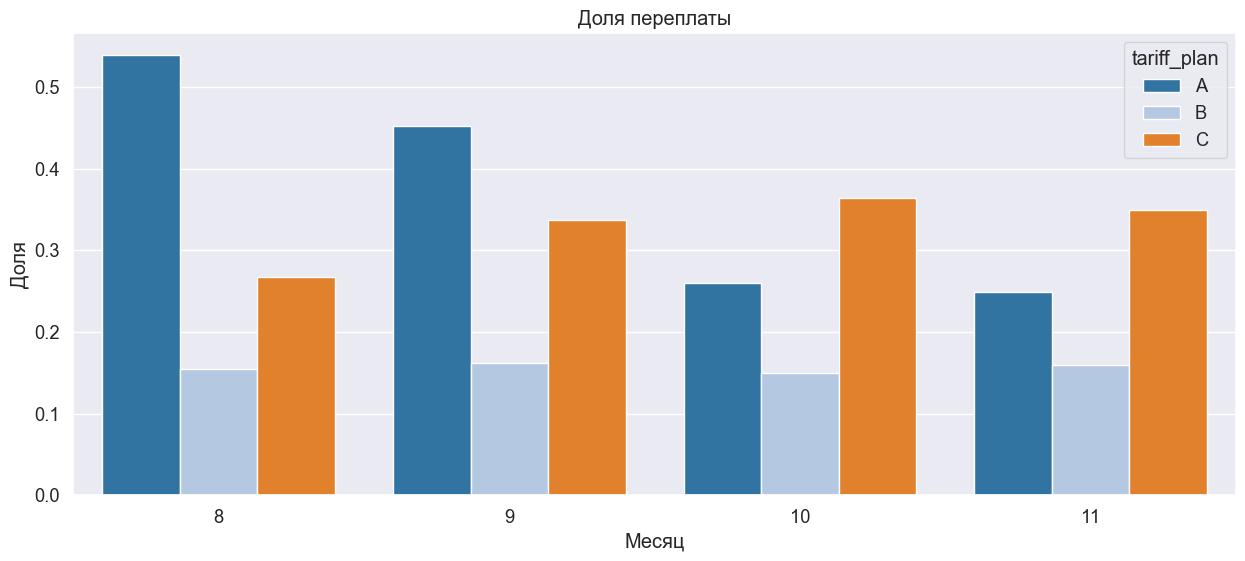

In [67]:
over = (revenue.query('optimal == False').groupby(['tariff_plan', 'month'])['over'].sum() 
      / revenue.query('optimal == False').groupby(['tariff_plan', 'month'])['actual_tariff']
        .sum()).reset_index().rename(columns={0: 'over_%'})
display(over.style.set_caption('Gthtgkfnf d ghjа'))

# столбчатый график
plt.figure(figsize=(15, 6))
ax = sns.barplot(data = over, x = 'month', y = 'over_%', hue = 'tariff_plan')
ax.set(xlabel='Месяц', ylabel='Доля')
ax.set_title('Доля переплаты')
plt.show()

Общий процент переплат у тарифа А снижается. У тарифа С незначительно растет, в пределах колебаний.  
Тариф В не имеет динамики.

In [68]:
print('\033[1m \nРаспределение переплаты в %:\033[0m \n', 
      revenue[revenue['over_%'] > 0]['over_%'].describe())
print('\033[1m \nРаспределение переплаты:\033[0m \n', 
      revenue.query('over > 0')['over'].describe())

 
Распределение переплаты в %: 
 count    284.000000
mean      25.811245
std       17.271413
min        0.070961
25%       12.577691
50%       21.845191
75%       38.221741
max       78.335162
Name: over_%, dtype: float64
 
Распределение переплаты: 
 count       284.000000
mean       9342.348592
std       21109.655858
min          12.100000
25%         856.850000
50%        2132.300000
75%        7698.225000
max      212529.200000
Name: over, dtype: float64


<font color='light blue'> **Количество клиентов с неоптимальным тарифом** </font> 

In [69]:
print('\033[1m \nКоличество клиентов переплачивающих каждый месяц\033[0m', 
      revenue.groupby('user_id')['optimal'].sum()
      .reset_index().query('optimal == 4').user_id.count())

 
Количество клиентов переплачивающих каждый месяц 7


In [70]:
print('\033[1m \nКоличество клиентов с неоптимальным тарифом в ноябре\033[0m')
(revenue.query('optimal == False and month == 11')
 .groupby(['tariff_plan', 'best_tariff'])
 ['user_id'].nunique().reset_index())


 
Количество клиентов с неоптимальным тарифом в ноябре


,tariff_plan,best_tariff,user_id
0,A,B,8
1,A,C,4
2,B,A,20
3,B,C,31
4,C,A,27
5,C,B,21


In [71]:
revenue.query('month == 11').optimal.count()

179

##### Вывод   
    
**Выручка** ежемесячно растет, что логично с учетом роста количества клиентов.  
- Тариф A - с 789 958 до 3 107 792  
- Тариф В - с 444 357 до 1 833 860  
- Тариф A - с 78 777 до 2 459 393  
  
95% клиентов платят не больше 123 367 руб в месяц.  
  
**Средний чек** у тарифа А выше других тарифов более чем на 100 000.  
У тарифа В колеблется примерно на одном уровне - 22 218-26 198 , Тариф А вырос 4 924-28 924.  
Средний чек тарифа А колеблется в районе 130 000, но в сентябре был скачек до 208 499 руб.   
  
**Потери при переводе на оптимальный тариф**  
Общая сумма переплат: 2 653 226 руб  
Общая сумма переплат в месяц выросла с 95 334 до 1 122 881.    
Тариф A - четкой динамики нет, колебания от 17 063 до 33 531   
Тариф В - с 64 444 до 25 8778  
Тариф С - с 13 827 до 836 552  
  
На диаграмме рассеивания видно что:  
*клиенты группы А:*  
- большая часть клиентов переплачивают до 4000 в абсолютном значении   
- до 78% в относительном значении   
  
*клиенты группы B:*  
- в абсолютном значении переплачивают до 63 761  
- в относительном значении переплачивают до 48%   

*клиенты группы С:*  
- в абсолютном значении переплачивают до 212 529  
- в относительном значении переплачивают до 42%
  
Виден тренд снижения суммарной доли переплаты клиентов на неоптимальном тарифе А с 54% до 25%  
Тариф B колеблется в пределах 16%  
Тариф С имеет тенденцию к росту с 26% до 35%
  
Средний процент переплат за 4 месяца 25,81%. Средняя сумма переплат 9 342 руб.   
  
В Ноябре 112 клиентов с неоптимальным тарифом (12 тариф А и 51 тариф В, 48) из 179. 

### Неактивные клиенты

#### Расчет

Отфильтруем неактивных клиентов, объединим таблицы, добавим столбец с месяцем

In [72]:
# срез только активных пользователей
noactive_users_id = data.query('user_id not in @active_users_id')

# объединение таблиц
noactive_users_id = noactive_users_id.merge(tariff_plan, on = 'user_id', how = 'left')

# Создание столбцов с дополнительными данными
noactive_users_id['month'] = noactive_users_id['date'].dt.month # месяц


Сгруппируем данные по клиентам, месяцам, направлению и тарифу. И посчитаем продолжительность

In [73]:
# подгатовка файла для расчета выручки
revenue_noactive = (noactive_users_id.query('direction == "out"') # исключение входящих звонков
 .groupby(['user_id', 'month', 'internal', 'tariff_plan']) # группировка
           ['total_call_duration'] .sum().reset_index()) # сумма

revenue_noactive.head(8)

,user_id,month,internal,tariff_plan,total_call_duration
0,166507,8,False,C,95
1,166874,8,False,C,12
2,166874,9,False,C,75
3,166874,10,False,C,223
4,166936,8,False,C,10557
5,166936,8,True,C,1
6,166936,9,False,C,8551
7,166941,8,False,B,35432


In [74]:
# создание таблицы с тарифами
df_tariffs = pd.DataFrame(
    {
        'tariff_plan': ['A', 'B', 'C'],
        'price_month': [5000, 2000, 1000],
        'calls_out_internal': [0.1, 0.15, 0.3],
        'calls_out_external': [0.4, 0.5, 0.7]
    }
)

Создадим три столбца для каждого тарифа в который посчитаем стоимость трат на звонки. Для дальнейшего сравнения с текущим тарифом, и выявления оптимального

In [75]:
# расчет расходов на исходящие звонки внутренние и внешние для всех тарифов
for i, tariff in enumerate(df_tariffs['tariff_plan']):
    revenue_noactive['part_' + tariff] = (
        revenue_noactive.loc[(revenue_noactive['internal'] == True) & 
                (revenue_noactive['total_call_duration'] > 2000)]['total_call_duration']
                                * df_tariffs['calls_out_internal'][i])
    
    revenue_noactive['part_' + tariff] = (
        revenue_noactive.loc[(revenue_noactive['internal'] == False)]['total_call_duration']
                * df_tariffs['calls_out_external'][i])
    
    revenue_noactive['part_' + tariff] = revenue_noactive['part_' + tariff].fillna(0)

Сгруппируем, что бы убрать деление на внутренние и внешние. Добавим количество операторов для каждого клиента.

In [76]:
# группировка, убираем деление на внутренние и внешние
revenue_noactive = revenue_noactive.groupby(['user_id', 'month', 'tariff_plan']) \
          ['part_A', 'part_B', 'part_C'].sum().reset_index()

In [77]:
# подсчет количества операторову каждого клиента
operators_noactive = (noactive_users_id.query('operator_id != "w/n"')
                      .groupby(['user_id', 'month'])['operator_id'].nunique().reset_index())

# добавление операторов к таблице с выручкой
revenue_noactive = revenue_noactive.merge(
    operators_noactive, on = ['user_id', 'month'], how = 'left')

В столбцы с выручкой добавим абонентскую плату и плату за операторов

In [78]:
operator_cost = 100 # стоимость за одного оператора
# Добавление абонентской платы и расходов на операторов
for i, tariff in enumerate(df_tariffs['tariff_plan']):
    revenue_noactive['profit_' + tariff] = (
        df_tariffs['price_month'][i] + (revenue_noactive['operator_id'] * operator_cost) \
            + revenue_noactive['part_' + tariff])

Создадим столбец с выручкой по текущему тарифу

In [79]:
revenue_noactive['actual_tariff'] = revenue_noactive.apply(opt_tariff, axis = 1)

Выявим оптимальный тариф и создадим столбец с выручкой по этому тарифу

In [80]:
# создание столбца с оптимальными тарифом
revenue_noactive['best_tariff'] = revenue_noactive[['profit_A', 'profit_B', 'profit_C']].idxmin(axis=1)

In [81]:
# сокращения названия оптимального тарифа
revenue_noactive['best_tariff'] = revenue_noactive['best_tariff'].replace('profit_A', 'A')
revenue_noactive['best_tariff'] = revenue_noactive['best_tariff'].replace('profit_B', 'B')
revenue_noactive['best_tariff'] = revenue_noactive['best_tariff'].replace('profit_C', 'C')

In [82]:
revenue_noactive['optimal'] = revenue_noactive.apply(opt, axis = 1)

In [83]:
revenue_noactive['rev_hypothetic'] = revenue_noactive.apply(rev_hypothetic, axis = 1)

Создадим столбец с суммой переплаты и с процентом переплаты

In [84]:
# суммы переплаты по неоптимальному тарифу
revenue_noactive['over'] = revenue_noactive['actual_tariff'] - revenue['rev_hypothetic']

# процент переплаты по неоптимальному тарифу
revenue_noactive['over_%'] = revenue['over'] / revenue_noactive['actual_tariff'] * 100

In [85]:
revenue_noactive.head(5)

,user_id,month,tariff_plan,part_A,part_B,part_C,operator_id,profit_A,profit_B,profit_C,actual_tariff,best_tariff,optimal,rev_hypothetic,over,over_%
0,166507,8,C,38.0,47.5,66.5,2,5238.0,2247.5,1266.5,1266.5,C,True,1266.5,-35445.1,379.226214
1,166874,8,C,4.8,6.0,8.4,1,5104.8,2106.0,1108.4,1108.4,C,True,1108.4,-46625.6,684.184410
2,166874,9,C,30.0,37.5,52.5,2,5230.0,2237.5,1252.5,1252.5,C,True,1252.5,-43930.3,552.550898
3,166874,10,C,89.2,111.5,156.1,2,5289.2,2311.5,1356.1,1356.1,C,True,1356.1,-42197.5,482.147334
4,166936,8,C,4222.8,5278.5,7389.9,2,9422.8,7478.5,8589.9,8589.9,B,False,7478.5,7389.9,0.000000


#### Анализ

Выявим последний месяц активности клиента, добавим эти данные в таблицу

In [86]:
# таблица с последним днем месяца
max_month = revenue_noactive.groupby('user_id')['month'].max().reset_index()

In [87]:
# добавление столбца с последним днем месяца
revenue_noactive = revenue_noactive.merge(max_month, how = 'left', on = 'user_id')

In [88]:
print('\033[1m \nДоля клиентов с неоптимальным тарифом среди неактивных клиентов\033[0m',
(revenue_noactive.query('month_x == month_y and optimal == 0').user_id.count() 
/ revenue_noactive.query('month_x == month_y').user_id.count()))

 
Доля клиентов с неоптимальным тарифом среди неактивных клиентов 0.43333333333333335


#### Вывод 
  
Неактивных клиентов 46 шт. Только у 43% из них были неоптимальные тарифы в последний месяц использования услуг.  
Следовательно, мы не можем утверждать что причиной оттока был неоптимальный тариф.

## Шаг 3. Проверка статистических гипотез

### Гипотеза о равенстве выручки при использовании текущего и оптимального тарифов

**Нулевая** - Средняя выручка текущего и оптимального тарифа равны  
**Альтернативная** - Средняя выручка текущего и оптимального тарифа не равны

In [89]:
# выборки
sample_1 = revenue['actual_tariff'] # выборка актуальный тариф
sample_2 = revenue['rev_hypothetic'] # выборка оптимальный тариф

# тест Леванте
stat, p = levene(sample_1, sample_2)
p


0.6277287808996691

Результат по тесту Левенте превышает 0,05. Это говорит нам о том, что дисперсии гомогенны, при проверке используем параметры по умолчанию.

In [90]:
alpha = 0.05 # порог значимости 
# тест Манна — Уитни
results = st.ttest_ind(sample_1, sample_2)

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
# рассчитаем метрики для интепретации результатов  
mean_val = round(sample_2.mean()/ (sample_1.mean()) - 1, 2) * 100
abs_val = sample_2.mean() - sample_1.mean()
val = sample_2.sum() - sample_1.sum()
print(f'Относительные изменения после смены тарифа  {mean_val:.4} %')
print(f'Абсолютное среднего чека после смены тарифа  {abs_val:.2f} рубля')

p-значение: 0.5889150333698321
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительные изменения после смены тарифа  -14.0 %
Абсолютное среднего чека после смены тарифа  -5657.20 рубля


### Гипотеза о равенстве выручки при использовании текущего и альтернативного тарифа

#### Смена абонентско платы

**Нулевая** - Средняя выручка текущего и альтернативного тарифа равны  
**Альтернативная** - Средняя выручка текущего и альтернативного тарифа не равны

Уменьшим абонентскую плату на 25%


In [91]:
def alt_rev_abon(row):
    '''Функция для создания столбца с альернативной выручкой
       (уменьшение абонентской платы тариф А)'''
    
    if row['tariff_plan'] == 'A':
        return row['actual_tariff'] - 1250
    if row['tariff_plan'] == 'B':
        return row['actual_tariff'] - 500
    else:
        return row['actual_tariff'] - 250

revenue['alternative_rev'] = revenue.apply(alt_rev_abon, axis = 1)    

In [92]:
sample_1 = revenue['actual_tariff'] # выборка актуальный тариф
sample_2 = revenue['alternative_rev'] # выборка альтернативный тариф

# тест Леванте
stat, p = levene(sample_1, sample_2)
p

0.9969123124938075

Результат по тесту Левене превышает 0,05. Это говорит нам о том, что дисперсии гомогенны, при проверке используем параметры по умолчанию.

In [93]:
alpha = 0.05 # порог значимости 
# тест Манна — Уитни
results = st.ttest_ind(sample_1, sample_2)

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
# рассчитаем метрики для интепретации результатов  
mean_val = round(sample_2.mean()/ (sample_1.mean()) - 1, 2) * 100
abs_val = sample_2.mean() - sample_1.mean()
val = sample_2.sum() - sample_1.sum()
print(f'Относительные изменения после смены тарифа  {mean_val:.4} %')
print(f'Абсолютное среднего чека после смены тарифа  {abs_val:.2f} рубля')

p-значение: 0.9635329751012273
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительные изменения после смены тарифа  -1.0 %
Абсолютное среднего чека после смены тарифа  -483.48 рубля


#### Смена стоимости минуты.

**Нулевая** - Средняя выручка текущего и альтернативного тарифа равны  
**Альтернативная** - Средняя выручка текущего и альтернативного тарифа не равны

Уменьшим оплаты за минуту на одну копейку  

In [94]:
# таблица для расчета выручки с адьтернативной тарификацией
alternative_rev = (active_users.query('direction == "out"')
 .groupby(['user_id', 'month', 'internal', 'tariff_plan'])['total_call_duration']
 .sum().reset_index())


In [95]:
def rev_tar(row):
    '''Функция для расчета расходов на исходящие звонки для всех тарифов'''
    
    if row.tariff_plan == 'A':
        if row.internal == False:
            return row.total_call_duration * .3
    
    if row.tariff_plan == 'B':
        if row.internal == False:
            return row.total_call_duration * .4
    
    if row.tariff_plan == 'C':
        if row.internal == False:
            return row.total_call_duration * .6
    
    return 0

alternative_rev['alternative_rev'] = alternative_rev.apply(rev_tar, axis = 1)

In [96]:
# группировка, убираем деление на внутренние и внешние
alternative_rev = alternative_rev.groupby(['user_id', 'month', 'tariff_plan']) \
          ['alternative_rev'].sum().reset_index()

In [97]:
# добавление столбца с количеством операторов
alternative_rev = alternative_rev.merge(operators, on = ['user_id', 'month'], how = 'left')

In [98]:
def abon_tar(row):
    '''Функция для добавления абонентской платы и расходов на операторов'''    

    if row['tariff_plan'] == 'A':
        return row['alternative_rev'] + 5000 + row['operator_id'] * operator_cost
    
    if row['tariff_plan'] == 'B':
        return row['alternative_rev'] + 2000 + row['operator_id'] * operator_cost
    
    else:
        return row['alternative_rev'] + 1000 + row['operator_id'] * operator_cost

alternative_rev['alternative_rev'] = alternative_rev.apply(abon_tar, axis = 1)

In [99]:
# отбираем данные для тестирования
sample_1 = revenue['actual_tariff']
sample_2 = alternative_rev['alternative_rev']

# тест Леванте
stat, p = levene(sample_1, sample_2)
p

0.41225804814725775

Результат по тесту Левене превышает 0,05. Это говорит нам о том, что дисперсии гомогенны, при проверке используем параметры по умолчанию.

In [100]:
# за порог значимости принимаем .05
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2)

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
# рассчитаем метрики для интепретации результатов  
mean_val = round(sample_2.mean()/ (sample_1.mean()) - 1, 3) * 100
abs_val = sample_2.mean() - sample_1.mean()
val = sample_2.sum() - sample_1.sum()
print(f'Относительные изменения после смены тарифа  {mean_val:.4} %')
print(f'Абсолютное среднего чека после смены тарифа  {abs_val:.2f} рубля')

p-значение: 0.4038789657326337
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительные изменения после смены тарифа  -19.4 %
Абсолютное среднего чека после смены тарифа  -7834.67 рубля


### Вывод  
  
**Гипотеза о равенстве выручки при использовании текущего и оптимального тарифов**  
  
Статистическая значимость не обнаружена. 
По данным пользователям, заказчик может потерять в среднем 5657.20 руб на клиента.  
Наблюдаем уменьшение среднего чека - а значит и снижение выручки. Общая доля снижения выручки 14%
  
**Гипотеза о равенстве выручки при использовании текущего и альтернативного тарифа**  
  
**Смена Абонентской платы**  
  
Статистическая значимость не обнаружена.  
По данным пользователям, заказчик может потерять в среднем 483.48 руб на клиента.   
Наблюдаем уменьшение среднего чека - а значит и снижение выручки. Общая доля снижения выручки 1%   
  
**Смена стоимости минут**  
  
Статистическая значимость не обнаружена.  
По данным пользователям, заказчик может потерять в среднем 7834.67 руб на клиента.   
Наблюдаем уменьшение среднего чека - а значит и снижение выручки. Общая доля снижения выручки 19,4%     

## Общий вывод

Мы провели анализ данных на предмет аномалий и активности клиентов. По результатам анализа мы получили 261 активных клиентов.  
В данных много аномалий начиная от пропусков и дубликатов и заканчивая аномальными данными в столбце call_duration.  
Т.к. не было известно указаны минуты или секунды, на основе анализа и предположений было принято решение считать минуты.  
  
По результатам анализа мы выяснили, ежемесячно наблюдается рост количества пользователей и нагрузки на колл-центр нашего заказчика. Как следствие рост выручки на всех тарифах.  
Нам удалось выяснить что самый дорогой средний чек у тарифа А.  
В каждом тарифе есть клиенты с неоптимальным планом. Нет одного оптимального тарифа для всех. Оптимальный тариф зависит от количества минут.  
   
Провели тестирование трех гипотез. Сравнили средний чек:  
- текущего тарифа и оптимального.
- текущего и альтернативного тарифа. Уменьшение абонентской платы
- текущего и альтернативного. Уменьшение платы за минуты
  
Во всех гипотезах не удалось отвергнуть нулевую гипотезу.    
В процессе тестирования убедились что выбор оптимального тарифа зависит от продолжительности разговоров.  
  
**Рекомендации**  
  
При переводе всех клиентов на оптимальный тариф заказчик потеряет 14% выручки.    
При уменьшении абонентской платы тарифа на 25% заказчик потеряет 1%.  
При уменьшении платы за минуты всего на 1 копейку можно потерять 19,4%. 
  
Вариант с уменьшением абонентской платы не удержит клиентов.  
Из оставшихся двух вариантов для заказчика менее убыточным будет перевести на существующие оптимальные тарифы.  
Но следует провести анализ рынка конкурентов, и возможно выбрать вариант с уменьшением тарифной платы.  
  
Для минимизации потерь:  
- отделу продаж стоит найти новых клиентов.
- отделу маркетинга стоит изучить потребность клиентов с целью выяснения малой активности в выходные дни. Исходя из потребности, можно разработать предложения которые смогут стимулировать клиентов быть более активными в выходные.
- так же исходя из потребностей клиентов можно подумать насчет стимулирования увеличения операторов у клиентов. Сейчас в среднем 3-4 оператора у клиента
